In [98]:
# load data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')
input_data  = pd.read_csv('data/marriage.csv',header=None)
X = input_data.drop([54], axis=1)
y = input_data[54]

# split data to train and test


#def functions 
def split(data, target):
    train_data, test_data, train_target, test_target = train_test_split(data, target,test_size=0.2,random_state=1)
    return train_data, test_data, train_target, test_target
def KNN(X,y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    return neigh.fit(X, y)
def LR(X,y):
    lm = LogisticRegression(random_state=0)
    return lm.fit(X, y)
def NB(X,y):
    gnb = GaussianNB(var_smoothing=1e-3)
    return gnb.fit(X, y)
def pcatrain(data):
    pca_raw = PCA(n_components=2).fit(data) 
    return pca_raw
def show_plot(test_X,test_y): 
    ty=np.asarray(test_y)
    for i in range(len(ty)):

        if ty[i]==1:
            c='red'
        else:
            c="blue"
        plt.scatter(test_X[i,0],test_X[i,1],  color = c)
train_X, test_X, train_y, test_y = split(X, y)

In [50]:
#Q1 part 1 a

# Navie Bayes:
nb=NB(train_X,train_y)
nb_acc=accuracy_score(test_y, nb.predict(test_X))
#KNN
knn=KNN(train_X,train_y)
knn_acc=accuracy_score(test_y, knn.predict(test_X))
#Logistic Regression
lr=LR(train_X,train_y)
lr_acc=accuracy_score(test_y, lr.predict(test_X))
Q1 = pd.DataFrame({'Navie Bayes': [nb_acc], 'K-NN': [knn_acc], 'Logistic Regression': [lr_acc]}).T.rename(columns={0: 'Accuary'})

display(Q1)

,Accuary
Navie Bayes,0.941176
K-NN,0.941176
Logistic Regression,0.941176


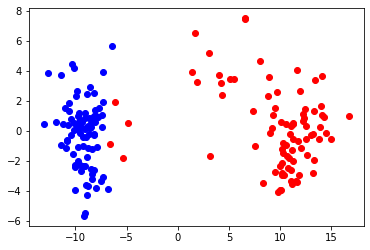

In [119]:
#Q1 part 1 b
pca_X=pcatrain(X).transform(X)
train_X, test_X, train_y, test_y = split(pca_X, y)
show_plot(X,y)

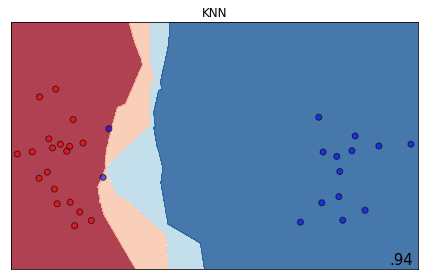

In [124]:
#KNN
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02 
x_min, x_max = pca_X[:, 0].min() - .5, pca_X[:, 0].max() + .5
y_min, y_max = pca_X[:, 1].min() - .5, pca_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
knn=KNN(train_X,train_y)
ax = plt.subplot(1,1,1)
score = knn.score(test_X, test_y)
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the testing points
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("KNN")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

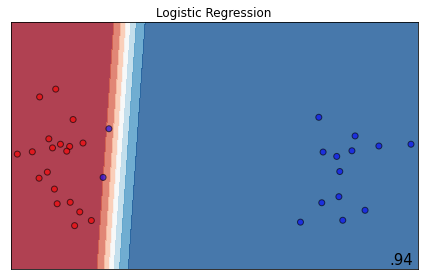

In [125]:
#Logistic Regression
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02 
x_min, x_max = pca_X[:, 0].min() - .5, pca_X[:, 0].max() + .5
y_min, y_max = pca_X[:, 1].min() - .5, pca_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
lr=LR(train_X,train_y)
ax = plt.subplot(1,1,1)
score = lr.score(test_X, test_y)
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the testing points
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Logistic Regression")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

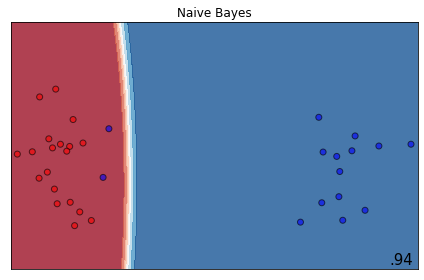

In [126]:
#Naive Bayes,
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02 
x_min, x_max = pca_X[:, 0].min() - .5, pca_X[:, 0].max() + .5
y_min, y_max = pca_X[:, 1].min() - .5, pca_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
nb=NB(train_X,train_y)
ax = plt.subplot(1,1,1)
score = nb.score(test_X, test_y)
Z = nb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the testing points
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Naive Bayes")
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [146]:
from sklearn import svm
import scipy.io
import random
from itertools import chain
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def score(true,pred):
    cm=pd.DataFrame(confusion_matrix(true,pred))
    ps=precision_score(true, pred, average=None)
    rs=recall_score(true, pred, average=None)
    f1=f1_score(true, pred, average=None)
    display(cm)
    Q1_2 = pd.DataFrame({'precision_score': ps, 'recall_score': rs, 'f1_score': f1}).T
    display(Q1_2)
    print("Accuary score is:\n  " ,accuracy_score(true, pred))
def Neural(X, y,xtest):
    train = MLPClassifier(hidden_layer_sizes=(20, 10)).fit(X,y)
    return train.predict(xtest)
                          
def Normal_SVM(X, y,xtest,kernel='linear'):
    if kernel=='linear':
        train=svm.SVC().fit(X, y)
    else:
        train=svm.SVC(kernel=kernel, gamma=2).fit(X, y)
    return train.predict(xtest)
mat = scipy.io.loadmat('data/mnist_10digits.mat')
train_X=StandardScaler().fit_transform(mat['xtrain'])
train_y=mat['ytrain'][0]
test_X=StandardScaler().fit_transform(mat['xtest'])
test_y=mat['ytest'][0]
random.seed=1
sampled_list = random.choices(list(zip(train_X,train_y)), k=5000)
train_sample_X=list(zip(*sampled_list))[0]
train_sample_y=list(zip(*sampled_list))[1]
NSVM_predy=Normal_SVM(train_sample_X, train_sample_y,test_X)
knn_predy     = KNN(train_sample_X,train_sample_y).predict(test_X)
lr_predy      = LR(train_X,train_y).predict(test_X)
poly_SVM_predy= Normal_SVM(train_X, train_y,test_X,'poly')
rbf_SVM_predy = Normal_SVM(train_X, train_y,test_X,'rbf')
Neural_predy  = Neural(train_X, train_y,test_X)

In [147]:
#KNN
score(test_y,knn_predy)

,0,1,2,3,4,5,6,7,8,9
0,957,1,1,3,1,8,6,1,1,1
1,0,1127,2,1,1,0,4,0,0,0
2,24,33,886,30,14,0,14,15,16,0
3,2,5,18,932,1,18,2,14,13,5
4,3,23,10,3,873,2,6,3,3,56
5,15,6,7,51,14,757,12,3,18,9
6,27,11,5,1,8,11,895,0,0,0
7,1,38,11,7,17,1,0,891,2,60
8,25,15,21,31,18,41,4,8,799,12
9,10,12,4,12,39,8,0,55,5,864


,0,1,2,3,4,5,6,7,8,9
precision_score,0.899436,0.886703,0.918135,0.870215,0.885396,0.894799,0.949099,0.900000,0.932322,0.857994
recall_score,0.976531,0.992952,0.858527,0.922772,0.889002,0.848655,0.934238,0.866732,0.820329,0.856293
f1_score,0.936399,0.936825,0.887331,0.895723,0.887195,0.871116,0.941610,0.883053,0.872747,0.857143


Accuary score is:
   0.8981


In [148]:
# logistic regression
score(test_y,lr_predy)

,0,1,2,3,4,5,6,7,8,9
0,954,0,2,2,2,10,6,2,2,0
1,0,1110,7,2,0,2,3,1,10,0
2,9,12,924,17,10,4,12,8,33,3
3,4,1,18,922,3,25,2,11,18,6
4,1,3,8,3,913,1,8,8,6,31
5,9,5,3,28,9,781,15,8,30,4
6,9,4,9,4,7,19,902,1,3,0
7,2,8,22,7,6,2,0,947,3,31
8,9,12,4,23,8,27,9,11,856,15
9,6,7,2,10,22,8,0,24,7,923


,0,1,2,3,4,5,6,7,8,9
precision_score,0.951147,0.955250,0.924925,0.905697,0.931633,0.888510,0.942529,0.927522,0.884298,0.911155
recall_score,0.973469,0.977974,0.895349,0.912871,0.929735,0.875561,0.941545,0.921206,0.878850,0.914767
f1_score,0.962179,0.966478,0.909897,0.909270,0.930683,0.881988,0.942037,0.924353,0.881565,0.912957


Accuary score is:
   0.9232


In [149]:
#SVM
score(test_y,NSVM_predy)

,0,1,2,3,4,5,6,7,8,9
0,952,0,10,1,0,9,5,2,1,0
1,0,1116,6,1,0,1,4,0,6,1
2,7,1,961,13,7,1,5,14,23,0
3,0,1,38,926,1,11,0,13,16,4
4,1,1,31,0,915,0,7,5,2,20
5,6,1,17,25,7,800,13,3,15,5
6,11,2,34,1,9,12,887,0,2,0
7,0,13,43,5,5,1,0,932,2,27
8,8,2,22,14,11,18,6,7,880,6
9,5,6,25,14,31,2,0,17,7,902


,0,1,2,3,4,5,6,7,8,9
precision_score,0.961616,0.976378,0.809604,0.926000,0.927992,0.935673,0.956850,0.938570,0.922432,0.934715
recall_score,0.971429,0.983260,0.931202,0.916832,0.931772,0.896861,0.925887,0.906615,0.903491,0.893954
f1_score,0.966497,0.979807,0.866156,0.921393,0.929878,0.915856,0.941114,0.922316,0.912863,0.913880


Accuary score is:
   0.9271


In [150]:
#poly SVM
score(test_y,poly_SVM_predy)

,0,1,2,3,4,5,6,7,8,9
0,954,0,5,1,0,8,3,4,4,1
1,0,1124,3,0,0,1,4,0,2,1
2,4,2,941,15,16,0,4,16,33,1
3,0,1,6,964,2,9,0,8,16,4
4,0,0,4,1,950,0,3,4,3,17
5,3,0,3,18,8,833,4,1,16,6
6,7,4,4,2,26,19,887,0,9,0
7,0,10,13,5,18,1,0,942,7,32
8,6,0,7,10,7,11,0,3,926,4
9,4,6,1,13,33,2,0,7,15,928


,0,1,2,3,4,5,6,7,8,9
precision_score,0.975460,0.979948,0.953394,0.936832,0.896226,0.942308,0.980110,0.956345,0.898157,0.933602
recall_score,0.973469,0.990308,0.911822,0.954455,0.967413,0.933857,0.925887,0.916342,0.950719,0.919722
f1_score,0.974464,0.985101,0.932145,0.945562,0.930460,0.938063,0.952228,0.935917,0.923691,0.926610


Accuary score is:
   0.9449


In [151]:
#rbf_SVM
score(test_y,rbf_SVM_predy)

,0,1,2,3,4,5,6,7,8,9
0,0,980,0,0,0,0,0,0,0,0
1,0,1135,0,0,0,0,0,0,0,0
2,0,1032,0,0,0,0,0,0,0,0
3,0,1010,0,0,0,0,0,0,0,0
4,0,982,0,0,0,0,0,0,0,0
5,0,892,0,0,0,0,0,0,0,0
6,0,958,0,0,0,0,0,0,0,0
7,0,1028,0,0,0,0,0,0,0,0
8,0,974,0,0,0,0,0,0,0,0
9,0,1009,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9
precision_score,0.0,0.113500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
recall_score,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.0,0.203862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuary score is:
   0.1135


In [152]:
#Neural_Network
score(test_y,Neural_predy)

,0,1,2,3,4,5,6,7,8,9
0,957,1,5,3,0,1,7,0,3,3
1,1,1119,5,2,1,2,1,1,2,1
2,10,7,968,9,9,0,6,16,7,0
3,0,1,12,949,5,15,1,14,5,8
4,1,2,13,1,919,4,5,6,2,29
5,1,4,1,20,3,834,9,2,9,9
6,6,3,10,0,10,19,905,1,4,0
7,2,7,13,13,4,4,2,968,3,12
8,8,4,9,16,11,20,3,7,885,11
9,4,8,0,5,22,8,1,19,7,935


,0,1,2,3,4,5,6,7,8,9
precision_score,0.966667,0.967993,0.934363,0.932220,0.933943,0.919515,0.962766,0.936170,0.954693,0.927579
recall_score,0.976531,0.985903,0.937984,0.939604,0.935845,0.934978,0.944676,0.941634,0.908624,0.926660
f1_score,0.971574,0.976866,0.936170,0.935897,0.934893,0.927182,0.953635,0.938894,0.931089,0.927119


Accuary score is:
   0.9439


In [59]:
NSVM_predy=Normal_SVM(train_sample_X, train_sample_y,test_X)
NSVM_acc=accuracy_score(test_y, NSVM_predy)

In [58]:
knn_pred=KNN(train_sample_X,train_sample_y).predict(test_X)
knn_acc=accuracy_score(test_y, knn.predict(test_X))

In [69]:
poly_SVM_predy=Normal_SVM(train_sample_X, train_sample_y,test_X,'poly')
rbf_SVM_predy=Normal_SVM(train_sample_X, train_sample_y,test_X,'rbf')

In [70]:
knn_pred
NSVM_predy
poly_SVM_predy

array([7, 3, 3, ..., 9, 5, 6], dtype=int64)

In [73]:
Neural_predy

array([3, 1, 3, ..., 3, 3, 3], dtype=int64)

In [72]:
Neural_predy=Neural(train_sample_X, train_sample_y,test_X)


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def score(true,pred):
    cm=pd.DataFrame(confusion_matrix(true,pred))
    ps=precision_score(true, pred, average=None)
    rs=recall_score(true, pred, average=None)
    f1=f1_score(true, pred, average=None)
    display(cm)
    Q1_2 = pd.DataFrame({'precision_score': ps, 'recall_score': rs, 'f1_score': f1}).T
    display(Q1_2)


In [80]:
#KNN
score(test_y,knn_pred)

,0,1,2,3,4,5,6,7,8,9
0,811,3,26,54,0,16,64,5,1,0
1,2,813,299,15,0,0,1,1,4,0
2,73,127,632,73,13,5,36,17,53,3
3,21,62,33,839,0,19,2,8,22,4
4,17,93,23,93,362,12,30,241,7,104
5,43,89,23,348,7,304,19,41,10,8
6,79,32,31,46,47,5,713,5,0,0
7,12,99,30,56,23,2,1,686,16,103
8,50,143,64,237,9,9,12,33,403,14
9,22,84,9,122,117,13,9,324,9,300


,0,1,2,3,4,5,6,7,8,9
precision_score,0.717699,0.526214,0.540171,0.445566,0.626298,0.789610,0.803833,0.504041,0.767619,0.559701
recall_score,0.827551,0.716300,0.612403,0.830693,0.368635,0.340807,0.744259,0.667315,0.413758,0.297324
f1_score,0.768720,0.606716,0.574024,0.580021,0.464103,0.476116,0.772900,0.574299,0.537692,0.388350
